In [142]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [77]:
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\creditcard.csv')

In [135]:
Y=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\creditcard.csv')['Class']

In [106]:
X=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\creditcard.csv').drop('Class',axis=1)

In [143]:
from sklearn import preprocessing
coder=preprocessing.LabelEncoder()
coder.fit(Y)
Y=pd.DataFrame(coder.transform(Y).reshape(-1,1))
Y.value_counts()

0    284315
1       492
dtype: int64

In [144]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
# X=X.drop('Time',axis=1).drop('Amount',axis=1)

In [145]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [157]:
X_train.shape, X_test.shape, y_train.size, y_test.size

((190820, 30), (93987, 30), 190820, 93987)

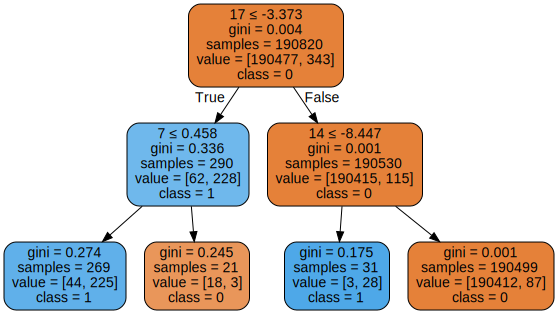

In [112]:
import graphviz
dot_data = tree.export_graphviz(modelRF, out_file=None,
                                feature_names=X.columns,
                                class_names=['0','1'], 
                                filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [247]:
true_predicted=pd.DataFrame()
true_predicted['Class']=y_test

In [166]:
modelRF=RandomForestClassifier(max_depth=3, random_state=0)
modelRF.fit(X_train,y_train)
y_RF=modelRF.predict(X_test)

KeyboardInterrupt: 

In [248]:
true_predicted['RF Predicted Class']=y_RF.reshape(-1,1)
pd.crosstab(true_predicted['RF Predicted Class'],true_predicted['Class'])

Class,0,1
RF Predicted Class,,
0,93822,56
1,16,93


In [162]:
modelDT=tree.DecisionTreeClassifier(max_depth=3)
modelDT.fit(X_train,y_train)
y_DT=modelDT.predict(X_test)

In [250]:
true_predicted['DT Predicted Class']=y_DT.reshape(-1,1)
pd.crosstab(true_predicted['DT Predicted Class'],true_predicted['Class'])

Class,0,1
DT Predicted Class,,
0,93804,38
1,34,111


In [163]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train,y_train)
y_KNN = modelKNN.predict(X_test)

In [249]:
true_predicted['KNN Predicted Class']=y_KNN.reshape(-1,1)
pd.crosstab(true_predicted['KNN Predicted Class'],true_predicted['Class'])

Class,0,1
KNN Predicted Class,,
0,93821,35
1,17,114


In [252]:
from sklearn.metrics import classification_report


print('RandomForest \n',classification_report(true_predicted['Class'],true_predicted['RF Predicted Class']))
print('---------\nDecisionTree \n',classification_report(true_predicted['Class'],true_predicted['DT Predicted Class']))
print('---------\nKNeighbours \n',classification_report(true_predicted['Class'],true_predicted['KNN Predicted Class']))

RandomForest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.85      0.62      0.72       149

    accuracy                           1.00     93987
   macro avg       0.93      0.81      0.86     93987
weighted avg       1.00      1.00      1.00     93987

---------
DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.77      0.74      0.76       149

    accuracy                           1.00     93987
   macro avg       0.88      0.87      0.88     93987
weighted avg       1.00      1.00      1.00     93987

---------
KNeighbours 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.87      0.77      0.81       149

    accuracy                           1.00     93987
   macro avg       0.93      0.88      0.91     93987
weighted a